In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import pyarrow.parquet as pq
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## Load dataframe

In [3]:
path = 'Data/Prob2/raw_train.parquet'
df = pq.read_table(source=path).to_pandas()

### Info

In [4]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,V1,4.781942,V2,V8,1337.025331,V4,V4,2.0,V2,V0,...,V2,35.689494,none,V1,1.0,V2,1.0,none,yes,0
1,V3,22.764682,V4,V2,1664.415301,V0,V4,4.0,V1,V0,...,V0,23.265980,none,V1,2.0,V2,1.0,none,yes,0
2,V3,7.462099,V2,V3,750.653224,V3,V2,4.0,V2,V0,...,V2,34.060872,stores,V0,1.0,V2,1.0,yes,yes,0
3,V3,23.718364,V4,V7,4829.002078,V4,V2,4.0,V1,V0,...,V3,62.477448,none,V1,2.0,V1,1.0,none,yes,0
4,V3,13.768903,V3,V3,3559.956292,V3,V4,1.0,V1,V0,...,V2,41.999120,bank,V1,1.0,V2,1.0,yes,yes,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   60000 non-null  object 
 1   feature2   60000 non-null  float64
 2   feature3   60000 non-null  object 
 3   feature4   60000 non-null  object 
 4   feature5   60000 non-null  float64
 5   feature6   60000 non-null  object 
 6   feature7   60000 non-null  object 
 7   feature8   60000 non-null  float64
 8   feature9   60000 non-null  object 
 9   feature10  60000 non-null  object 
 10  feature11  60000 non-null  float64
 11  feature12  60000 non-null  object 
 12  feature13  60000 non-null  float64
 13  feature14  60000 non-null  object 
 14  feature15  60000 non-null  object 
 15  feature16  60000 non-null  float64
 16  feature17  60000 non-null  object 
 17  feature18  60000 non-null  float64
 18  feature19  60000 non-null  object 
 19  feature20  60000 non-null  object 
 20  label 

### Describe

In [6]:
df.describe()

,feature2,feature5,feature8,feature11,feature13,feature16,feature18,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,20.862730,3207.836096,2.953933,2.837467,35.641207,1.422100,1.159317,0.303583
std,12.083299,2792.931181,1.120535,1.105427,11.261281,0.606441,0.365974,0.459809
min,0.648717,-5997.669542,1.000000,1.000000,17.673884,1.000000,1.000000,0.000000
25%,11.959326,1388.207670,2.000000,2.000000,27.185829,1.000000,1.000000,0.000000
50%,18.087706,2273.676224,3.000000,3.000000,33.135070,1.000000,1.000000,0.000000
75%,24.903486,3813.300359,4.000000,4.000000,40.958943,2.000000,1.000000,1.000000
max,73.201640,19046.986011,4.000000,4.000000,82.179053,4.000000,2.000000,1.000000


In [7]:
df.describe(include="object").T

,count,unique,top,freq
feature1,60000,4,V3,23659
feature3,60000,5,V2,31782
feature4,60000,11,V3,16634
feature6,60000,5,V0,35846
feature7,60000,5,V2,20178
feature9,60000,5,V2,32919
feature10,60000,3,V0,54407
feature12,60000,4,V2,19540
feature14,60000,3,none,48517
feature15,60000,3,V1,42275


In [8]:
# Below function prints unique value counts and percentages for the category/object type variables


def category_unique_value():
    for col in df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list():
        print("Unique values and corresponding data counts for feature: " + col)
        print("-" * 90)
        df_temp = pd.concat(
            [
                df[col].value_counts(),                          
                df[col].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

category_unique_value()

Unique values and corresponding data counts for feature: feature1
------------------------------------------------------------------------------------------
    Count  Percentage
V3  23659   39.431667
V0  16355   27.258333
V1  16130   26.883333
V2   3856    6.426667
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature3
------------------------------------------------------------------------------------------
    Count  Percentage
V2  31782   52.970000
V4  17474   29.123333
V3   5317    8.861667
V1   2936    4.893333
V0   2491    4.151667
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature4
------------------------------------------------------------------------------------------
     Count  Percentage
V3   16634   27.723333
V0   14005   23.341667
V2   10761   17.935000
V1    6183   

In [9]:
# Select columns with dtype 'float'
num_columns_names = df.select_dtypes(include=['float64']).columns

# Print the selected columns
print(num_columns_names)

Index(['feature2', 'feature5', 'feature8', 'feature11', 'feature13',
       'feature16', 'feature18'],
      dtype='object')


In [10]:
# Select columns with dtype 'object'
object_columns_names = df.select_dtypes(include=['object']).columns

# Print the selected columns
print(object_columns_names)

Index(['feature1', 'feature3', 'feature4', 'feature6', 'feature7', 'feature9',
       'feature10', 'feature12', 'feature14', 'feature15', 'feature17',
       'feature19', 'feature20'],
      dtype='object')


## Dummies Variable

In [11]:
for i in [8, 11, 16]:
    feature_num = pd.get_dummies(df[f'feature{i}'], drop_first=True)
    feature_num.columns = feature_num.columns.astype(str)
    feature_num = feature_num.rename(columns={'2.0': f'feature{i}_2.0', '3.0': f'feature{i}_3.0', '4.0': f'feature{i}_4.0'})
    df = pd.concat([df, feature_num], axis=1)
    df.drop(f'feature{i}', axis=1, inplace=True)
#     print(feature_num)  

In [12]:
feature18 = pd.get_dummies(df['feature18'], drop_first=True)
feature18.columns = feature18.columns.astype(str)
feature18 = feature18.rename(columns={'2.0': 'feature18_2.0'})
df = pd.concat([df, feature18], axis=1)
df.drop('feature18', axis=1, inplace=True)

In [13]:
feature14 = pd.get_dummies(df['feature14'], drop_first=True)
df = pd.concat([df, feature14], axis=1)

In [14]:
feature19 = pd.get_dummies(df['feature19'], drop_first=True)
df = pd.concat([df, feature19], axis=1)

In [15]:
feature20 = pd.get_dummies(df['feature20'], drop_first=True)
feature20 = feature20.rename(columns={'yes': 'feature20_yes'})
df = pd.concat([df, feature20], axis=1)

In [16]:
for column in object_columns_names:
    if column in ['feature14', 'feature19', 'feature20']:
        continue
    feature_dummies = pd.get_dummies(df[column], drop_first=True)
    new_column_names = {}
    for i in range(1, df[column].nunique()):
        new_column_names.update({f'V{i}': f'{column}_V{i}'})
    feature_dummies = feature_dummies.rename(columns=new_column_names)
    
    df = pd.concat([df, feature_dummies], axis=1)
#     print(feature_dummies.head())

In [17]:
df.drop(object_columns_names, axis=1, inplace=True)

In [18]:
df.columns

Index(['feature2', 'feature5', 'feature13', 'label', 'feature8_2.0',
       'feature8_3.0', 'feature8_4.0', 'feature11_2.0', 'feature11_3.0',
       'feature11_4.0', 'feature16_2.0', 'feature16_3.0', 'feature16_4.0',
       'feature18_2.0', 'none', 'stores', 'yes', 'feature20_yes',
       'feature1_V1', 'feature1_V2', 'feature1_V3', 'feature3_V1',
       'feature3_V2', 'feature3_V3', 'feature3_V4', 'feature4_V1',
       'feature4_V10', 'feature4_V2', 'feature4_V3', 'feature4_V4',
       'feature4_V5', 'feature4_V6', 'feature4_V7', 'feature4_V8',
       'feature4_V9', 'feature6_V1', 'feature6_V2', 'feature6_V3',
       'feature6_V4', 'feature7_V1', 'feature7_V2', 'feature7_V3',
       'feature7_V4', 'feature9_V1', 'feature9_V2', 'feature9_V3',
       'feature9_V4', 'feature10_V1', 'feature10_V2', 'feature12_V1',
       'feature12_V2', 'feature12_V3', 'feature15_V1', 'feature15_V2',
       'feature17_V1', 'feature17_V2', 'feature17_V3'],
      dtype='object')

## Label

([<matplotlib.patches.Wedge at 0x7f81fd6d3ba8>,
 [Text(-0.6365048996877849, 0.8971407429570027, '0'),
  Text(0.6365048996877848, -0.8971407429570029, '1')],
 [Text(-0.34718449073879176, 0.4893494961583651, ' 69.64%\n 41785'),
  Text(0.3471844907387917, -0.48934949615836515, ' 30.36%\n 18215')])

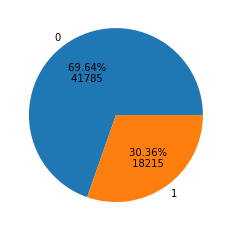

In [19]:
total = df['label'].value_counts().sum()
def fmt(x):
    return f'{x: .2f}%\n{total * x / 100: .0f}'

plt.pie(df['label'].value_counts().values, labels=df['label'].value_counts().index, autopct=fmt)

## Split data in Train, Validation and Test sets

In [20]:
X, y = df.drop('label', axis=1), df['label']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Test and Validation sizes
test_size = .1
val_size = .11

# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, stratify=y_temp)

print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (48060, 56) 

Validation Data Shape: 

 (5940, 56) 

Testing Data Shape: 

 (6000, 56)


#### Checking the ratio of labels in the target column for each of the data segments

In [23]:
print("Training:\n", y_train.value_counts(normalize=True))
print("\nValidation:\n", y_val.value_counts(normalize=True))
print("\nTest:\n", y_test.value_counts(normalize=True))

Training:
 0    0.696421
1    0.303579
Name: label, dtype: float64

Validation:
 0    0.696465
1    0.303535
Name: label, dtype: float64

Test:
 0    0.696333
1    0.303667
Name: label, dtype: float64


### Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
for i in [2, 5, 13]:
    col = f'feature{i}'
    sc = StandardScaler()
    scale_train = sc.fit_transform(X_train[col].values.reshape(-1, 1))
    scale_test = sc.transform(X_test[col].values.reshape(-1, 1))
    scale_val = sc.transform(X_val[col].values.reshape(-1, 1))
    
    # Assign the scaled data back
    X_train.loc[:, col] = scale_train.flatten()
    X_test.loc[:, col] = scale_test.flatten()
    X_val.loc[:, col] = scale_val.flatten()

In [26]:
X_train, X_test, X_val = X_train.values, X_test.values, X_val.values

## K-Fold Cross-Validation

In [27]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
        
      _scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Training ROC-AUC": results['train_roc_auc'],
              "Mean Training ROC-AUC": results['train_roc_auc'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              "Validation ROC-AUC": results['test_roc_auc'],
              "Mean Validation ROC-AUC": results['test_roc_auc'].mean()
              }

In [28]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(8, 4))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=20)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

# Models

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logistic = LogisticRegression(max_iter=1000)
logistic_result = cross_validation(logistic, X_train, y_train)
logistic_result

{'Training Accuracy scores': array([0.78532043, 0.78506034, 0.78342176, 0.78526841, 0.78375988]),
 'Mean Training Accuracy': 78.45661672908864,
 'Training Precision scores': array([0.69039661, 0.68837055, 0.68764726, 0.68998888, 0.68722123]),
 'Mean Training Precision': 0.6887249056198745,
 'Training Recall scores': array([0.53092872, 0.53349897, 0.52510281, 0.53144277, 0.52801576]),
 'Mean Training Recall': 0.5297978067169293,
 'Training F1 scores': array([0.60025184, 0.6011198 , 0.59548215, 0.6004259 , 0.59718992]),
 'Mean Training F1 Score': 0.5988939223757438,
 'Training ROC-AUC': array([0.82926966, 0.82979625, 0.82590552, 0.82830132, 0.82687372]),
 'Mean Training ROC-AUC': 0.8280292931861478,
 'Validation Accuracy scores': array([0.77892218, 0.78173117, 0.78942988, 0.78037869, 0.78662089]),
 'Mean Validation Accuracy': 78.34165626300458,
 'Validation Precision scores': array([0.67788246, 0.68755718, 0.69135274, 0.68282737, 0.69038208]),
 'Mean Validation Precision': 0.686000365889

In [ ]:
# plot_result(logistic,
#             "Accuracy",
#             "Accuracy scores in 5 Folds",
#             logistic_result["Training Accuracy scores"],
#             logistic_result["Validation Accuracy scores"])

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=4)

In [33]:
decision_tree_result = cross_validation(decision_tree, X_train, y_train)
decision_tree_result

{'Training Accuracy scores': array([0.73931024, 0.73187162, 0.73145547, 0.72971286, 0.72815231]),
 'Mean Training Accuracy': 73.21004993757803,
 'Training Precision scores': array([0.5953069 , 0.5503212 , 0.5503702 , 0.65571776, 0.63192042]),
 'Mean Training Precision': 0.5967272962070157,
 'Training Recall scores': array([0.44122687, 0.63853667, 0.63048321, 0.23089445, 0.2503427 ]),
 'Mean Training Recall': 0.43829677861549,
 'Training F1 scores': array([0.50681494, 0.59115606, 0.58770914, 0.34152832, 0.35861561]),
 'Mean Training F1 Score': 0.4771648143038932,
 'Training ROC-AUC': array([0.76203028, 0.76137165, 0.75939103, 0.76181586, 0.76007181]),
 'Mean Training ROC-AUC': 0.7609361257296079,
 'Validation Accuracy scores': array([0.73429047, 0.72315855, 0.72253433, 0.72648772, 0.72950479]),
 'Mean Validation Accuracy': 72.71951727007907,
 'Validation Precision scores': array([0.58683206, 0.53839259, 0.53638736, 0.64581231, 0.6320598 ]),
 'Mean Validation Precision': 0.58789682431289

In [34]:
# plot_result(decision_tree_result,
#             "Accuracy",
#             "Accuracy scores in 5 Folds",
#             decision_tree_result["Training Accuracy scores"],
#             decision_tree_result["Validation Accuracy scores"])

### Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_result = cross_validation(gnb, X_train, y_train)
gnb_result

{'Training Accuracy scores': array([0.71787869, 0.71767062, 0.72037557, 0.71985539, 0.71943924]),
 'Mean Training Accuracy': 71.90439034540158,
 'Training Precision scores': array([0.53343601, 0.53357442, 0.54060488, 0.53753228, 0.53737647]),
 'Mean Training Precision': 0.5365048128528089,
 'Training Recall scores': array([0.56382796, 0.55620288, 0.52527416, 0.55277587, 0.54506511]),
 'Mean Training Recall': 0.5486291980808773,
 'Training F1 scores': array([0.54821109, 0.54465372, 0.53282927, 0.54504752, 0.54119348]),
 'Mean Training F1 Score': 0.5423870157996084,
 'Training ROC-AUC': array([0.74600735, 0.7455274 , 0.74343465, 0.74601028, 0.74373372]),
 'Mean Training ROC-AUC': 0.7449426811177668,
 'Validation Accuracy scores': array([0.7142114 , 0.71806076, 0.72003745, 0.72086975, 0.71670828]),
 'Mean Validation Accuracy': 71.79775280898876,
 'Validation Precision scores': array([0.52785924, 0.5348292 , 0.5383835 , 0.54078445, 0.5327291 ]),
 'Mean Validation Precision': 0.534917098168

In [36]:
# plot_result(lgbm,
#             "Accuracy",
#             "Accuracy scores in 5 Folds",
#             gnb_result["Training Accuracy scores"],
#             gnb_result["Validation Accuracy scores"])

### Light GBM

In [37]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [38]:
lgbm = LGBMClassifier()
LGBM_result = cross_validation(lgbm, X_train, y_train)
LGBM_result

{'Training Accuracy scores': array([0.83143467, 0.83255306, 0.8306804 , 0.83130462, 0.83120058]),
 'Mean Training Accuracy': 83.14346650020808,
 'Training Precision scores': array([0.77451084, 0.77553169, 0.77515991, 0.7766752 , 0.7746449 ]),
 'Mean Training Precision': 0.775304510114268,
 'Training Recall scores': array([0.6273989 , 0.63108293, 0.6229438 , 0.6236292 , 0.62611378]),
 'Mean Training Recall': 0.6262337217272104,
 'Training F1 scores': array([0.69323614, 0.69589041, 0.69076572, 0.69178863, 0.6925045 ]),
 'Mean Training F1 Score': 0.6928370823367419,
 'Training ROC-AUC': array([0.8929498 , 0.89199903, 0.89049132, 0.89157673, 0.8905127 ]),
 'Mean Training ROC-AUC': 0.891505915000554,
 'Validation Accuracy scores': array([0.80950895, 0.80617978, 0.81887224, 0.80722014, 0.81075739]),
 'Mean Validation Accuracy': 81.05076987099459,
 'Validation Precision scores': array([0.73579176, 0.72924815, 0.74148543, 0.73345024, 0.72810295]),
 'Mean Validation Precision': 0.73361570626790

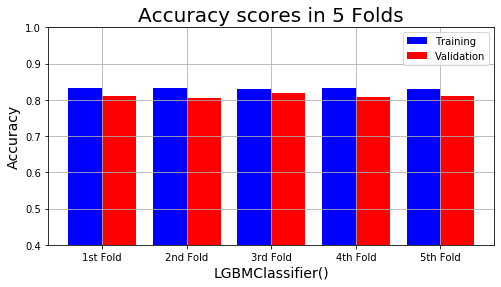

In [39]:
plot_result(lgbm,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            LGBM_result["Training Accuracy scores"],
            LGBM_result["Validation Accuracy scores"])

### ANN

In [40]:
opt = tf.keras.optimizers.SGD(learning_rate=.01, momentum=.9)

In [41]:
def create_model():
    model = Sequential()
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(.2))

    model.add(Dense(120, activation='relu'))
    model.add(Dropout(.5))

    model.add(Dense(78, activation='relu'))
    model.add(Dropout(.3))

    model.add(Dense(39, activation='relu'))
    model.add(Dropout(.3))

    model.add(Dense(19, activation='relu'))
    model.add(Dropout(.3))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['binary_accuracy'])
    
    return model

In [42]:
# Create a basic model instance
model = create_model()

### Checkpoint callback usage

In [43]:
checkpoint_path = "training_prob2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1, save_best_only=True)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=25, mode='min')

In [45]:
model.fit(X_train, y_train, batch_size=128, epochs=200, callbacks=[early_stop, cp_callback], validation_data=(X_val, y_val))

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
371/376 [============================>.] - ETA: 0s - loss: 0.6176 - binary_accuracy: 0.6835WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f81cc5b6950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY

#### History

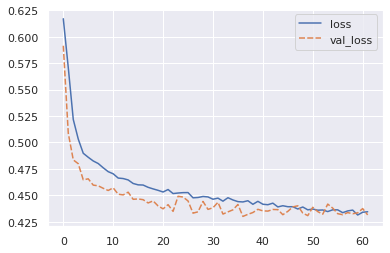

In [46]:
sns.set()
losses = pd.DataFrame(model.history.history)
sns.lineplot(data=losses[['loss', 'val_loss']])

In [47]:
# os.listdir(checkpoint_dir)

In [48]:
# latest = tf.train.latest_checkpoint(checkpoint_dir)
# latest

In [49]:
# # Create a new model instance
# model = create_model()

# # Load the previously saved weights
# model.load_weights(latest)

# # Re-evaluate the model
# loss, acc = model.evaluate(X_test, y_test, verbose=2)

# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [50]:
# # Save the weights
# model.save_weights('./checkpoints/my_checkpoint')

# # Create a new model instance
# model = create_model()

# # Restore the weights
# model.load_weights('./checkpoints/my_checkpoint')

# # Evaluate the model
# loss, acc = model.evaluate(X_test, y_test, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

#### Save the entire model

In [51]:
model.save('my_model.h5')

In [52]:
# # Recreate the exact same model, including its weights and the optimizer
# new_model = tf.keras.models.load_model('my_model.h5')

# # Show the model architecture
# new_model.summary()

In [53]:
# loss, acc = new_model.evaluate(X_test, y_test, verbose=2)
# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

#### Evaluating Model Performance

In [54]:
y_pred = (model.predict(X_test) > .5).astype("int32")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8001666666666667
[[3924  254]
 [ 945  877]]


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4178
           1       0.78      0.48      0.59      1822

    accuracy                           0.80      6000
   macro avg       0.79      0.71      0.73      6000
weighted avg       0.80      0.80      0.78      6000

